# Exploratory Data Analysis Project on Black Friday Sales in Stores

###  Data Analysis in an integral part  of Data Scienists role. effective analysis of Data help Bussinesses to plan their next step and understand the current demands of its customers, further more it is also used for customer targeting and bussiness stratergy planning.

### In this notebook we will explore the Black friday Sales data and derive insights to customer behavior and  product demands. A picture speaks thousands words and same applies to Data Analysis, no matter how hard you try to communicate verbally a graphical representation will always prove to be effective and give better understanding of underlying patterns in data.

### We will break up our Exploratory Data Analysis project in different number of Tasks as follows:


### Our task is to find the following insights from the data
### Task 1 : get highest purchasing age group
### Task 2 : find purchase ratio among males and females
### Task 3 : Total Sales made City wise
### Task 4 :  find the most purchased category of product
### Task 5 :  find product that generated the maximm revenue
### Task 6 : Get City wise purchase of product to understand demand of product in each city.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#read the file

retaildata = pd.read_csv("D://BlackFriday//BlackFriday.csv")
print(retaildata.head())
#make a copy of data
retaildata_c = pd.DataFrame(retaildata)

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

### TASK 1 : find highest purchasing age group
###  approach : generate count plot of Age column in dataframe using seaborn.

Text(0.5,1,'Highest Purchasing Age Group')

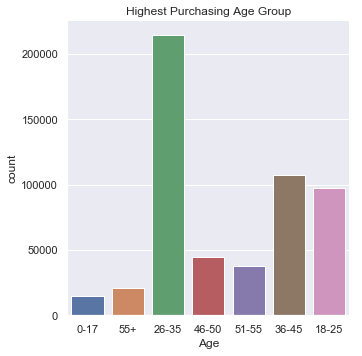

In [20]:
sns.set(style= "darkgrid")
sns.catplot(x="Age", kind="count",data=retaildata_c);
plt.title('Highest Purchasing Age Group')


### Age group 26-35 was the highest purchasing Age group for Black Friday sale.


## TASK 2: Find Purchase ratio among males and Females i.e prentage of purchases made b male customers and female customers

### approach : Generating a Pie chart which will gives us the clear picture of Ratio of Purchases made by Gender.

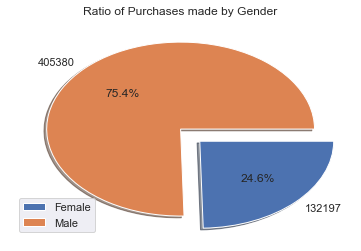

In [123]:
unique_gender = retaildata_c.Gender.unique()

countF = retaildata_c[retaildata_c['Gender'] == 'F'].count() 
countM = retaildata_c[retaildata_c['Gender'] == 'M'].count() 

values= [countF.Gender,countM.Gender]
labels = ['Female', 'Male']
explode = (0.2, 0)
plt.pie(values, labels= values,explode=explode,autopct='%1.1f%%',counterclock=False, shadow=True)
plt.title('Ratio of Purchases made by Gender')
plt.legend(labels,loc=3)
plt.show()
    

### about 75% of purchases was made by Male Customers and Female Customers accounted for approx 24% of purchases


## Task 3: Total Sales made City wise
### approach: Plot count plot to get count of purchases made in each city.

Text(0.5,1,'City wise Sale')

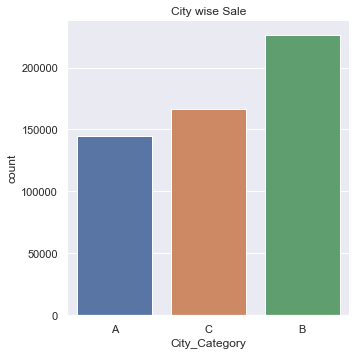

In [60]:
sns.set(style= "darkgrid")
sns.catplot(x="City_Category", kind="count",data=retaildata_c);
plt.title('Total Sales made City wise')

### City B acccounted for highest number of Sales

## Task 4: Plot Most purchased category of product
### appproach: get unique products under column product_category_1 and run a for loop to get count for each  products, plot the graph using pie chart.

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
[3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 16, 18, 10, 17, 9] [19849, 138353, 3875, 112132, 148592, 11567, 23499, 20164, 1500, 23960, 5440, 6203, 3668, 9697, 3075, 5032, 567, 404]


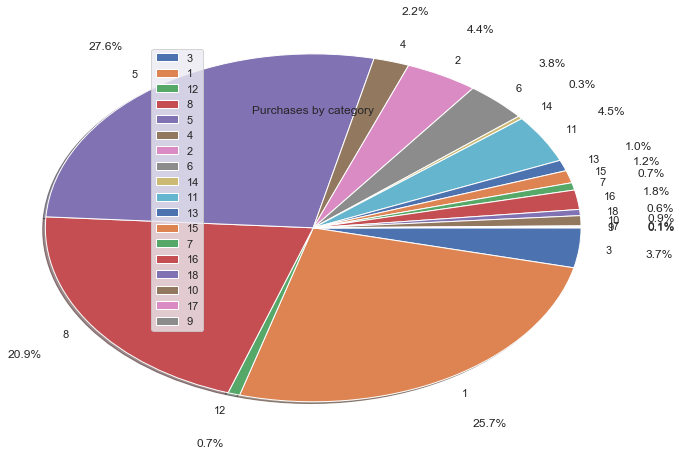

In [86]:
unique_Product_Cat_1 = retaildata_c.Product_Category_1.unique()
print(unique_Product_Cat_1)
list_product_cat_1 = []
list_product_count = []
for prod in unique_Product_Cat_1:
    prodname = prod
    count = retaildata_c[retaildata_c['Product_Category_1'] == prodname].count()
    list_product_cat_1.append(prodname)
    list_product_count.append(count.Product_Category_1)
    
print(list_product_cat_1,list_product_count)
    
#explode = (0.2, 0)
plt.pie(list_product_count, labels= list_product_cat_1,autopct='%1.1f%%',radius=2,pctdistance=1.3,labeldistance=1.1,counterclock=False, shadow=True)
plt.title('Purchases by category')
plt.legend(list_product_cat_1,loc=3)
plt.show()

### Product 5 was the most purchased product by the customers accounting for 27.6% of sales whereas product 9 was least purchased at just 0.1%

## TASK 5: Find Product category that generated Maximum revenue
### approach:  Product Category wise sum of Purchase column
### from abve pie chart we came to know product 5 was the most purchased product but was it the most revenue generating produt category? Let's find out

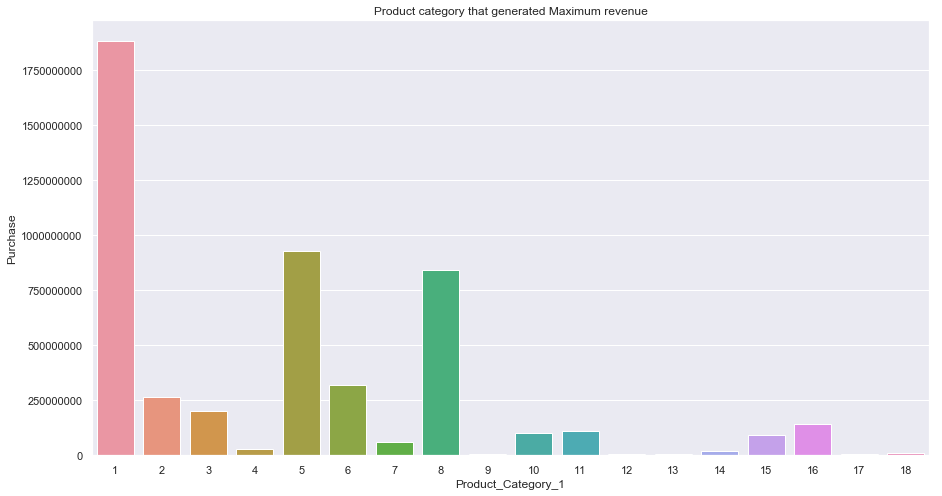

In [122]:
import numpy as np

productwise_revenue = retaildata_c.groupby(['Product_Category_1'])['Purchase'].sum().reset_index()

plt.figure(figsize=(15,8))
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('Product category that generated Maximum revenue')
ax = sns.barplot(x='Product_Category_1', y='Purchase',data=productwise_revenue)

### Product 1 generated the maximum revenue as seen in above bar chart 

## TASK 6:  Get City wise purchase of product to understand demand of product in each city.
### approach : group by product category and city to get count of different products purchased in each city
###                     create a new column in dataframe by merging City and Product for better understanding and ease of plotting
###                     plot a Line graph to visualize and understand the demand of customers in each city for different products


  Product_by_city  Purchase
0              1A     34553
1              1B     57417
2              1C     46383
3              2A      6045
4              2B     10274


Text(0.5,1,'City wise Purchase of Product')

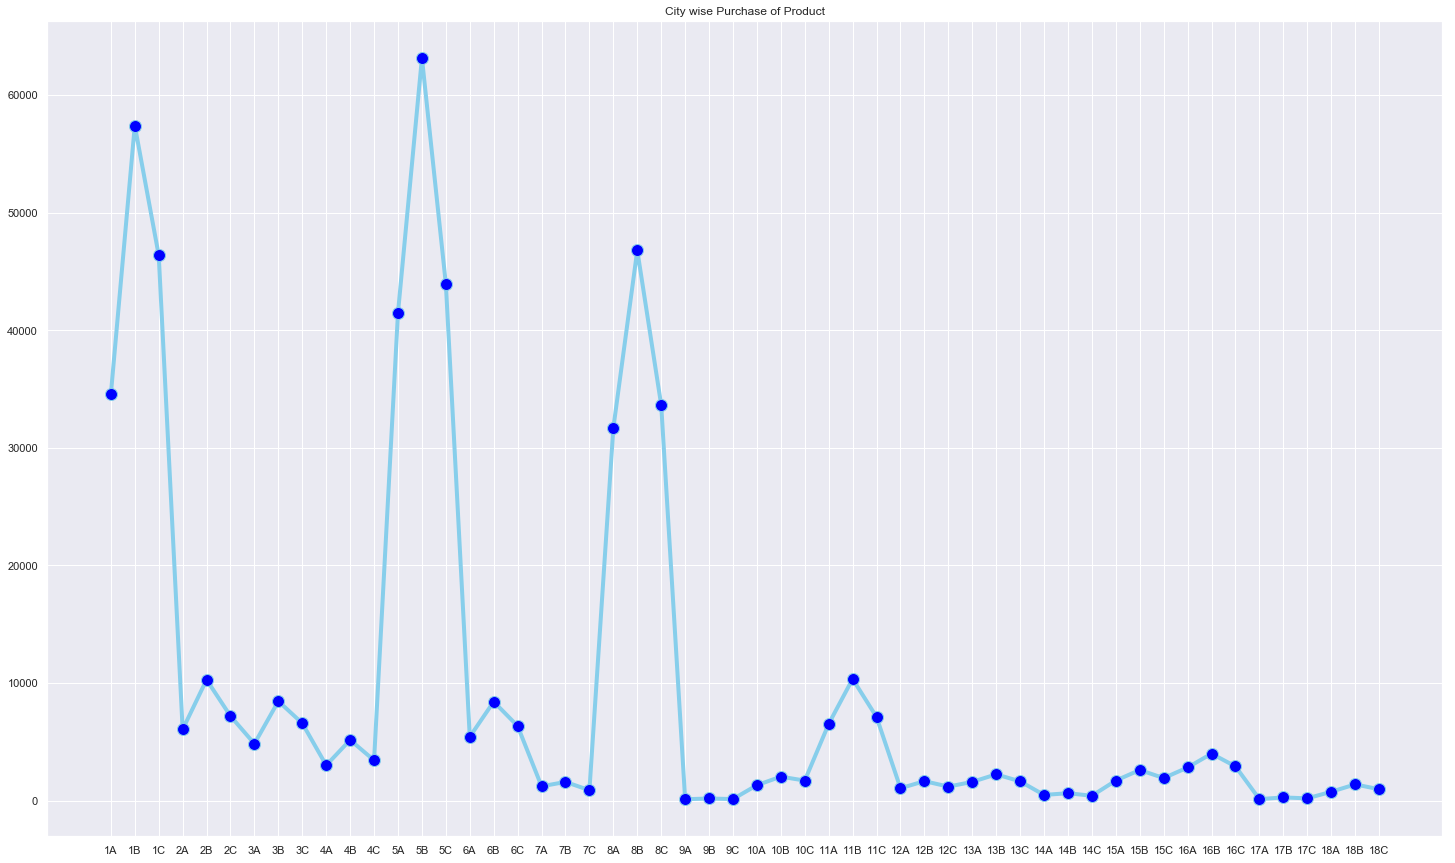

In [120]:
Citywise_prod_purchase = retaildata_c.groupby(['Product_Category_1','City_Category']).count().reset_index()
Citywise_prod_purchase[['Product_Category_1','City_Category','Purchase']]
Citywise_prod_purchase = pd.DataFrame(Citywise_prod_purchase)
Citywise_prod_purchase['Product_Category_1'] = Citywise_prod_purchase.Product_Category_1.astype(str)
Citywise_prod_purchase['Product_by_city'] = Citywise_prod_purchase[['Product_Category_1', 'City_Category']].apply(lambda x: ''.join(x), axis=1)
print(Citywise_prod_purchase[['Product_by_city','Purchase']].head())

 
plt.figure(figsize=(25,15))
plt.plot( 'Product_by_city', 'Purchase', data=Citywise_prod_purchase, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4) 
plt.title('City wise Purchase of Product')

### City B had high demands for all the products

### You may fork this notebook and add some your own analysis.

### Thankyou. :)